# Does the Electoral College Just Disenfranchise Democrats?

With the election behind us once again the electoral college, that forever most silly feature of American presidential elections is bubbling up as a part of the conversation. Typically when the topic comes up it usually pits Democrats against Republicans, with Democrats favoring an overturn of the system and with the Republicans favoring the system in place. While it's pretty apparent that the electoral college does disadvantage Democrats who are primarily located in more urban states. I was curious to see if it in fact also disenfranchises Republicans as well. The strongest argument that I hear in favor for the electoral college is that it gives a bump to more rural populations who would otherwise never have their concerns met. And it's typically Republican voices that bring up this concern. Which I don't fault them for advocating for their consituents. But I'm not sure if addressing that concern on a state level really makes much sense. While our typical idea of a rural voter might be someone living in Kansas or other midwestern states. I think we underestimate how rural/Republican huge swaths of even very populous states can be. So I decided to pull some state level data on the population, number of registered voters, and their partisan composition and see if there is a difference in partisan composition in more populous states compared to the average composition. 

I wrote all of this in a jupyter notebook and you can pull this notebook which contains my code and the associated data [here](https://github.com/coreyclip/coreyclip.github.io/tree/master/jupyternotebooks)

#### Sources for the data 
* partisan breakdown of states where available: 
https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states

* registered voters by state: 
https://worldpopulationreview.com/state-rankings/number-of-registered-voters-by-state
worldpopulationreview further posts sources from invidual state agencies handling the number of registered voters by state


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Data Overview

Here's the top 5 rows of the dataset. I calculated out the number of registered Democrats and Republicans per state myself from the original datasets. 

In [2]:
df = pd.read_csv('data/number_of_registered_voters_by_state.csv')
df['IndPercentage'] = 1 - (df['DemPercentage'] + df['RepubPercentage'])
df['Democrats'] = (df['totalRegistered'] * df['DemPercentage']).round()
df['Republicans'] = (df['totalRegistered'] * df['RepubPercentage']).round()
df['Independents'] = (df['totalRegistered'] * df['IndPercentage']).round()
df.set_index('State', inplace=True)
df.head()

,totalRegistered,Pop,registeredPerc,asOf,DemPercentage,RepubPercentage,IndPercentage,Democrats,Republicans,Independents
State,,,,,,,,,,
Alabama,3708804,4908620,0.7556,11/4/2020,0.35,0.52,0.13,1298081.0,1928578.0,482145.0
Alaska,597319,734002,0.8138,11/3/2020,0.13,0.24,0.63,77651.0,143357.0,376311.0
Arizona,4281152,7378490,0.5802,11/4/2020,0.33,0.35,0.32,1412780.0,1498403.0,1369969.0
Arkansas,1755775,3039000,0.5777,6/3/2020,0.35,0.48,0.17,614521.0,842772.0,298482.0
California,22047448,39937500,0.5520,10/19/2020,0.45,0.24,0.31,9921352.0,5291388.0,6834709.0


## Top 10 States By Number of Registered Voters 

First I opted to look at our dataset sorted by the number of registered Republicans. We can see that the up until recently solidly red state Texas contains the most Republicans but in second comes a "solidly" blue state California. What is worth noting is that three states traditionally thought of as swing states: Ohio, Florida, and Pennsylvania do come up the next three states with the most Republican voters. 

In [3]:
df.sort_values('Republicans', ascending=False).head(10)

,totalRegistered,Pop,registeredPerc,asOf,DemPercentage,RepubPercentage,IndPercentage,Democrats,Republicans,Independents
State,,,,,,,,,,
Texas,16211198,29472300,0.5500,3/1/2020,0.39,0.42,0.19,6322367.0,6808703.0,3080128.0
California,22047448,39937500,0.5520,10/19/2020,0.45,0.24,0.31,9921352.0,5291388.0,6834709.0
Florida,14065627,21993000,0.6396,8/31/2020,0.37,0.35,0.28,5204282.0,4922969.0,3938376.0
Ohio,7774767,11747700,0.6618,3/17/2020,0.41,0.45,0.14,3187654.0,3498645.0,1088467.0
Pennsylvania,9091371,12820900,0.7091,11/2/2020,0.48,0.38,0.14,4363858.0,3454721.0,1272792.0
Michigan,8127040,10045000,0.8091,11/3/2020,0.45,0.39,0.16,3657168.0,3169546.0,1300326.0
Georgia,7233584,10736100,0.6738,11/1/2020,0.43,0.42,0.15,3110441.0,3038105.0,1085038.0
New York,13555547,19440500,0.6973,11/1/2020,0.51,0.22,0.27,6913329.0,2982220.0,3659998.0
Illinois,8036534,12659700,0.6348,3/17/2020,0.50,0.34,0.16,4018267.0,2732422.0,1285845.0


## Top 10 States By Number of Registered Democratic Voters 

Looking at the states with the most Democrat voters. We can see that we basically have the same states but swap out Ohio for New York. 

In [4]:
df.sort_values('Democrats', ascending=False).head(10).reset_index()

,State,totalRegistered,Pop,registeredPerc,asOf,DemPercentage,RepubPercentage,IndPercentage,Democrats,Republicans,Independents
0,California,22047448,39937500,0.5520,10/19/2020,0.45,0.24,0.31,9921352.0,5291388.0,6834709.0
1,New York,13555547,19440500,0.6973,11/1/2020,0.51,0.22,0.27,6913329.0,2982220.0,3659998.0
2,Texas,16211198,29472300,0.5500,3/1/2020,0.39,0.42,0.19,6322367.0,6808703.0,3080128.0
3,Florida,14065627,21993000,0.6396,8/31/2020,0.37,0.35,0.28,5204282.0,4922969.0,3938376.0
4,Pennsylvania,9091371,12820900,0.7091,11/2/2020,0.48,0.38,0.14,4363858.0,3454721.0,1272792.0
5,Illinois,8036534,12659700,0.6348,3/17/2020,0.50,0.34,0.16,4018267.0,2732422.0,1285845.0
6,Michigan,8127040,10045000,0.8091,11/3/2020,0.45,0.39,0.16,3657168.0,3169546.0,1300326.0
7,Ohio,7774767,11747700,0.6618,3/17/2020,0.41,0.45,0.14,3187654.0,3498645.0,1088467.0
8,Georgia,7233584,10736100,0.6738,11/1/2020,0.43,0.42,0.15,3110441.0,3038105.0,1085038.0
9,Virginia,5975696,8626210,0.6927,11/1/2020,0.46,0.39,0.15,2748820.0,2330521.0,896354.0


## Top 10 States By Number of Independent Voters 

Independents are gathered in mostly the same states as Republicans and Democrats, Though check out Massachusetts! One thing worth noting that certain states through a combination of voting laws and partisan party rules end up depressing political party membership, amongst other factors. Since this post is just focusing on partisan politics I'm not really going to try and account for Independents too much it's an area for further investigation on the topic I'm covering. 

In [5]:
df.sort_values('Independents', ascending=False).head(10).reset_index()

,State,totalRegistered,Pop,registeredPerc,asOf,DemPercentage,RepubPercentage,IndPercentage,Democrats,Republicans,Independents
0,California,22047448,39937500,0.5520,10/19/2020,0.45,0.24,0.31,9921352.0,5291388.0,6834709.0
1,Florida,14065627,21993000,0.6396,8/31/2020,0.37,0.35,0.28,5204282.0,4922969.0,3938376.0
2,New York,13555547,19440500,0.6973,11/1/2020,0.51,0.22,0.27,6913329.0,2982220.0,3659998.0
3,Texas,16211198,29472300,0.5500,3/1/2020,0.39,0.42,0.19,6322367.0,6808703.0,3080128.0
4,Massachusetts,4812909,6976600,0.6899,10/24/2020,0.33,0.10,0.57,1588260.0,481291.0,2743358.0
5,New Jersey,6486299,8936570,0.7258,11/2/2020,0.38,0.22,0.40,2464794.0,1426986.0,2594520.0
6,North Carolina,7361219,10611900,0.6937,11/3/2020,0.36,0.30,0.34,2650039.0,2208366.0,2502814.0
7,Colorado,4238513,5845530,0.7251,11/1/2020,0.30,0.28,0.42,1271554.0,1186784.0,1780175.0
8,Arizona,4281152,7378490,0.5802,11/4/2020,0.33,0.35,0.32,1412780.0,1498403.0,1369969.0
9,Michigan,8127040,10045000,0.8091,11/3/2020,0.45,0.39,0.16,3657168.0,3169546.0,1300326.0


## Top 10 States By Number of Registered Voters 

Looking at the five most populous states in the US we can see that this is basically the same set of states with the most democratic voters and includes most of the states that have the most Republican and Independents. Of these really only Florida, Pennsylvania, and (Ohio or Georgia depending on your memory) are swing states. 

In [6]:
df.sort_values('totalRegistered', ascending=False).head(10)

,totalRegistered,Pop,registeredPerc,asOf,DemPercentage,RepubPercentage,IndPercentage,Democrats,Republicans,Independents
State,,,,,,,,,,
California,22047448,39937500,0.5520,10/19/2020,0.45,0.24,0.31,9921352.0,5291388.0,6834709.0
Texas,16211198,29472300,0.5500,3/1/2020,0.39,0.42,0.19,6322367.0,6808703.0,3080128.0
Florida,14065627,21993000,0.6396,8/31/2020,0.37,0.35,0.28,5204282.0,4922969.0,3938376.0
New York,13555547,19440500,0.6973,11/1/2020,0.51,0.22,0.27,6913329.0,2982220.0,3659998.0
Pennsylvania,9091371,12820900,0.7091,11/2/2020,0.48,0.38,0.14,4363858.0,3454721.0,1272792.0
Michigan,8127040,10045000,0.8091,11/3/2020,0.45,0.39,0.16,3657168.0,3169546.0,1300326.0
Illinois,8036534,12659700,0.6348,3/17/2020,0.50,0.34,0.16,4018267.0,2732422.0,1285845.0
Ohio,7774767,11747700,0.6618,3/17/2020,0.41,0.45,0.14,3187654.0,3498645.0,1088467.0
North Carolina,7361219,10611900,0.6937,11/3/2020,0.36,0.30,0.34,2650039.0,2208366.0,2502814.0


# The Electoral College disenfranchises people regardless of political affiliation

By looking at the partisan composition of the states with the most democrats or Republicans we can see that essentially by doing away with the electoral college and moving to a straight popular vote, it wouldn't mean that presidential candidates would be ignoring one political party or the other by campaigning in states where most voters live. A candidate looking to reach out to Republican voters or Democratic voters would do well to focus on Texas, California, and New York as these are plain where the bulk of either live. And by doing so they wouldn't be really disregarding the partisan composition of the nation as a whole. The partisan composition of the most democratic and republicans states doesn't really differ too much from the nationwide average, especially once we take into account that the states with the most democrats or republicans are for the most part the same.  

One thought I had looking at this data given our rather hideous political climate of today is how much potential do we waste with our undemocratic and anti-republican electoral college system? In effect the majority of democrats and republicans are basically taken as given in the actual election and instead our presidential politics is filtered through the lens of what matters to the voters in a couple of states. Unless your rather civically engaged this is most of the politics that really catches any of your attention. If instead we moved to popular vote the diversity of each political party would have to be taken into account by any candidate. We'd probably see more ideas out of the left and the right. This is purely annecdotal but coming from a resident of California, strong satisfaction with the priorities of either political party's candidate is very much the exception rather than the norm. Most feel dragged along with what has been given, and we loose out as a nation by not having their views informing our presidential campaigns. 

In [8]:
limit = 10

tdf = pd.DataFrame(index=[f'Top {limit} States with the most Democrats', f'Top {limit} States with the most Republicans', 'Nationwide Average'], data=[],
             columns=['% Democrat', '% Republican', '% of Total Registered Voters'])
tdf['% Republican'] = [df.sort_values('Democrats', ascending=False).head(limit)['RepubPercentage'].mean().round(3) * 100,
                       df.sort_values('Republicans', ascending=False).head(limit)['RepubPercentage'].mean().round(3) * 100,
                       df['RepubPercentage'].mean().round(3) * 100
                      ]

tdf['% Democrat'] = [  df.sort_values('Democrats', ascending=False).head(limit)['DemPercentage'].mean().round(3) * 100,
                       df.sort_values('Democrats', ascending=False).head(limit)['RepubPercentage'].mean().round(3) * 100,
                       df['DemPercentage'].mean().round(2) * 100
                      ]
tdf['% of Total Registered Voters'] = [(df.sort_values('Democrats', ascending=False).head(limit)['totalRegistered'].sum() / df['totalRegistered'].sum() * 100).round(3),
                         (df.sort_values('Republicans', ascending=False).head(limit)['totalRegistered'].sum() / df['totalRegistered'].sum() * 100).round(3),
                         np.nan]

tdf

,% Democrat,% Republican,% of Total Registered Voters
Top 10 States with the most Democrats,44.5,36.0,52.441
Top 10 States with the most Republicans,36.0,36.0,52.441
Nationwide Average,38.0,37.1,NaN


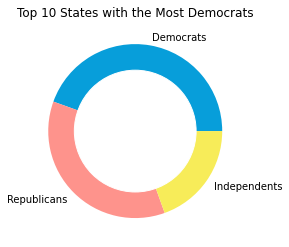

In [11]:
names = ['Democrats', 'Republicans', 'Independents']
dem_size = [df.sort_values('Democrats', ascending=False).head(limit)['DemPercentage'].mean(),
        df.sort_values('Democrats', ascending=False).head(limit)['RepubPercentage'].mean(),
        df.sort_values('Democrats', ascending=False).head(limit)['IndPercentage'].mean()]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(dem_size, labels=names, colors=['#079EDA', '#FE938C', '#F7EC59'])
plt.title(f'Top {limit} States with the Most Democrats')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


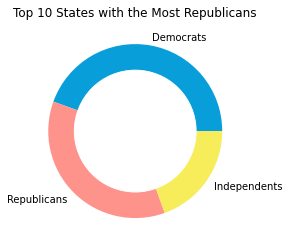

In [12]:
names = ['Democrats', 'Republicans', 'Independents']
repub_size = [df.sort_values('Republicans', ascending=False).head(limit)['DemPercentage'].mean(),
        df.sort_values('Republicans', ascending=False).head(limit)['RepubPercentage'].mean(),
        df.sort_values('Republicans', ascending=False).head(limit)['IndPercentage'].mean()]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(repub_size, labels=names, colors=['#079EDA', '#FE938C', '#F7EC59'])
plt.title(f'Top {limit} States with the Most Republicans')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


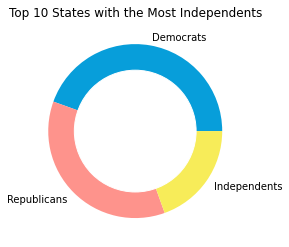

In [13]:
names = ['Democrats', 'Republicans', 'Independents']
independent_size = [df.sort_values('Independents', ascending=False).head(limit)['DemPercentage'].mean(),
        df.sort_values('Independents', ascending=False).head(limit)['RepubPercentage'].mean(),
        df.sort_values('Independents', ascending=False).head(limit)['IndPercentage'].mean()]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(repub_size, labels=names, colors=['#079EDA', '#FE938C', '#F7EC59'])
plt.title(f'Top {limit} States with the Most Independents')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
